Applied Deep Learning Final project Fall 2019:

*   Shuai Hao (sh3831)
*   Bhaskar Ghosh (bg2625)










## News article summarization

Summarization of content is an important research area for Natural Language Processing. Summarizing news articles is an important branch of this research. News publications like Associated Press, Bloomberg and Reuters are actively working on automating articles. In this landscape, it is also important to develop features that would help readers understand context of news articles quickly. 

Summarizing news articles is hence an important step in this direction. Readers often don't have time to read through entire articles, and reading only the headline and sub-heading does not inform them of all the important points discussed in the article. Also, it is not possible for news publications to prepare summaries of every article they publish. 

In this project, we attempt to generate summaries of news articles by extracting important sentences from a news article. Our work was inspired by a research paper on Content selection in Deep Learning Models of summarization by Prof. Kathleen McKeown and Chris Kedzie:
https://arxiv.org/pdf/1810.12343v2.pdf

Code from their research is available on the following repositories: 
*   https://github.com/kedz/nnsum 
*   https://github.com/kedz/summarization-datasets

While the research paper uses corpora from different fields, such as news, personal stories, meetings and medical reports, we are only concentrating on extractive summaries of news articles. We have used the CNN/Daily Mail corpus for this project.

The previous repo is for model training and evaluation, and the latter one is for preprocessing the different datasets used in the paper.

Our analysis is of a smaller scale, so we went for a bidirectional LSTM model for this project.

We have used three notebooks for this project, two for preprocessing the data and one for training and evaluating the model.




In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
%cd /gdrive/My Drive/Final Project

/gdrive/My Drive/Final Project


In [0]:
!ls

 cnn-dailymail.tar.gz
'Content Selection in Deep Learning Models of Summarization.pdf'
 glove
 model
 nnsum
 result
 summarization-datasets


### Here is the architecture of the model
* We start by taking sentences from documents, tokenize them and use pre-trained GloVe embeddings.
* We generated sentence embeddings by averaging the word embeddings of a sentence and fed them to the bidirectional LSTMs.
* The output is a list of probabilities of sentences being picked. For the summary, we pick the top four sentences in decreasing order of probability.




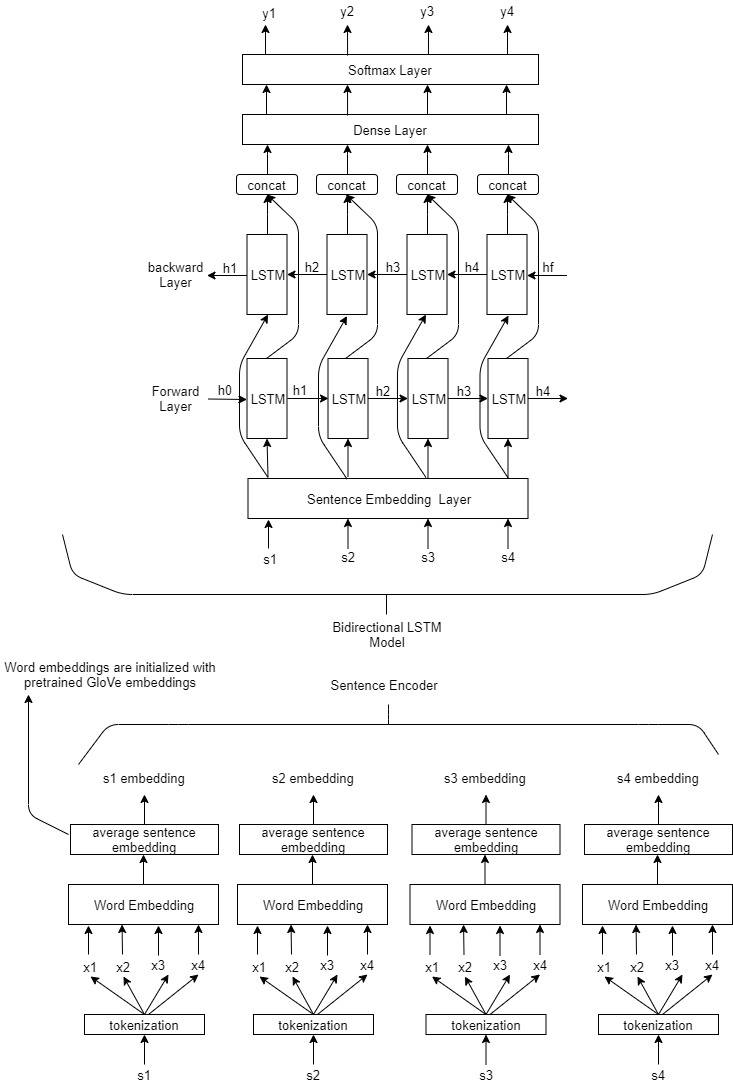

In [0]:
from IPython.display import Image, display
display(Image(filename = '/gdrive/My Drive/model_diag.jpg'))

In [0]:
%cd /gdrive/My Drive/Final Project/summarization-datasets

/gdrive/My Drive/Final Project/summarization-datasets


In [0]:
!ls

build  nnsum_data.egg-info	    preprocess_duc_sds.py  preprocess_reddit.py
data   preprocess_ami.py	    preprocess_nyt.py	   README.md
dist   preprocess_cnn_dailymail.py  preprocess_pubmed.py   setup.py


Running setup.py

In [0]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing nnsum_data.egg-info/PKG-INFO
writing dependency_links to nnsum_data.egg-info/dependency_links.txt
writing requirements to nnsum_data.egg-info/requires.txt
writing top-level names to nnsum_data.egg-info/top_level.txt
writing manifest file 'nnsum_data.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying nnsum_data.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying nnsum_data.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying nnsum_data.egg-info/dependency_links.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying nnsum_data.egg-info/requires.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying nnsum_data.egg-info/top_level.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
zip_safe flag not set; analyzing archive contents...
creati

In [0]:
!cpan install XML::DOM

Loading internal null logger. Install Log::Log4perl for logging messages

CPAN.pm requires configuration, but most of it can be done automatically.
If you answer 'no' below, you will enter an interactive dialog for each
configuration option instead.

Would you like to configure as much as possible automatically? [yes] yes
Fetching with HTTP::Tiny:
http://www.cpan.org/authors/01mailrc.txt.gz
Reading '/root/.cpan/sources/authors/01mailrc.txt.gz'
............................................................................DONE
Fetching with HTTP::Tiny:
http://www.cpan.org/modules/02packages.details.txt.gz
Reading '/root/.cpan/sources/modules/02packages.details.txt.gz'
  Database was generated on Wed, 04 Dec 2019 00:17:02 GMT
  HTTP::Date not available
.............
  New CPAN.pm version (v2.27) available.
  [Currently running version is v2.18]
  You might want to try
    install CPAN
    reload cpan
  to both upgrade CPAN.pm and run the new version without leaving
  the current session.




### Preprocess the CNN Daily Mail dataset

In [0]:
!python preprocess_cnn_dailymail.py --data-dir data/

[ 482735659 of  482735659]
Unpacking DailMail data.
[ 207268941 of  207268941]
Unpacking CNN data.
Writing cnn/dailymail validation data...
Writing story 13368/13368
Writing cnn/dailymail train data...
Writing story 597/287227
BAD: a460c7560b149c25fd89f46115b8a7865b4b1062
Writing story 610/287227
BAD: 6ce5c33e786e149d50e78aeadc5cf449e6da09ce

BAD: 59552b2a2e96a618d5bffbece2849438aa5d4ce1
Writing story 686/287227
BAD: 6972eff7e00f5c5b8bc864de2db115f31d53df61

BAD: 63951f504244c71e2e821c7780643b56e103145c
Writing story 1275/287227
BAD: f3e35fbb7821204344e8f40336f68bd5a396e330
Writing story 1338/287227
BAD: 325a0a28b647358e32731e174d5bcd2a7179f6bf
Writing story 1560/287227
BAD: d444271ebb079b8f78c34197bfbcf87ae5a41129
Writing story 1639/287227
BAD: a2a2ff9da575558d8d8544d0726b9a1c2aa20203
Writing story 1824/287227
BAD: 1efddd4caf41c8ecabbc6534b7ee38518c11f481
Writing story 1902/287227
BAD: ce3271caecf540a64b4ae1b5943194ee1084b712
Writing story 2043/287227
BAD: b750310e3a3537e2324539a05542

In [0]:
%cd /gdrive/My Drive/Final Project/nnsum

/gdrive/My Drive/Final Project/nnsum


In [0]:
!ls

build  dist  nnsum  nnsum.egg-info  README.md  script_bin  setup.py  tests


In [0]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing nnsum.egg-info/PKG-INFO
writing dependency_links to nnsum.egg-info/dependency_links.txt
writing requirements to nnsum.egg-info/requires.txt
writing top-level names to nnsum.egg-info/top_level.txt
writing manifest file 'nnsum.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/nnsum
creating build/bdist.linux-x86_64/egg/nnsum/io
copying build/lib/nnsum/io/vocab.py -> build/bdist.linux-x86_64/egg/nnsum/io
copying build/lib/nnsum/io/__init__.py -> build/bdist.linux-x86_64/egg/nnsum/io
copying build/lib/nnsum/io/vocab_util.py -> build/bdist.linux-x86_64/egg/nnsum/io
creating build/bdist.linux-x86_64/egg/nnsum/data
copying build/lib/nnsum/data/sample_cache_dataloader.py -> build/bdist.linux-x86_64/egg/nnsum/data
copying build/lib/nnsum/data/summarization_dataload